# Naive Bayes

In [1]:
!pip install naive-bayes

  Created wheel for naive-bayes: filename=naive_bayes-0.1.1-py3-none-any.whl size=2180 sha256=0b94078a17e242b34721b42e0e3d277d2f31ae50ff12b277f6890de02d22f7e7
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\29\fc\1f\44ea7f6ccb226e209a1fa1c4cfd6cddefa75e1691504542ae5
Successfully built naive-bayes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [4]:
train=pd.read_csv('SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,46,Private,10th,6,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,25.0,Ecuador,<=50K
6528,31,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,65.0,United-States,>50K
6529,38,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,7688.0,0.0,40.0,United-States,>50K
6530,44,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


In [5]:
test=pd.read_csv('SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8431,37,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
8432,33,Self-emp-not-inc,Bachelors,13,Divorced,Craft-repair,Not-in-family,White,Male,0,1590,60,United-States,<=50K
8433,48,State-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,38,United-States,>50K
8434,29,Private,Assoc-voc,11,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            6532 non-null   int64  
 1   workclass      6532 non-null   object 
 2   education      6532 non-null   object 
 3   educationno    6532 non-null   int64  
 4   maritalstatus  6532 non-null   object 
 5   occupation     6531 non-null   object 
 6   relationship   6531 non-null   object 
 7   race           6531 non-null   object 
 8   sex            6531 non-null   object 
 9   capitalgain    6531 non-null   float64
 10  capitalloss    6531 non-null   float64
 11  hoursperweek   6531 non-null   float64
 12  native         6531 non-null   object 
 13  Salary         6531 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 714.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8436 entries, 0 to 8435
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            8436 non-null   int64 
 1   workclass      8436 non-null   object
 2   education      8436 non-null   object
 3   educationno    8436 non-null   int64 
 4   maritalstatus  8436 non-null   object
 5   occupation     8436 non-null   object
 6   relationship   8436 non-null   object
 7   race           8436 non-null   object
 8   sex            8436 non-null   object
 9   capitalgain    8436 non-null   int64 
 10  capitalloss    8436 non-null   int64 
 11  hoursperweek   8436 non-null   int64 
 12  native         8436 non-null   object
 13  Salary         8435 non-null   object
dtypes: int64(5), object(9)
memory usage: 922.8+ KB


In [8]:
test.describe().round(2).style.background_gradient(cmap = 'Reds')

,age,educationno,capitalgain,capitalloss,hoursperweek
count,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000
mean,38.660000,10.120000,1166.060000,89.600000,41.060000
std,13.340000,2.560000,8030.470000,407.660000,12.030000
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3175.000000,99.000000


In [9]:
train.describe().round(2).style.background_gradient(cmap = 'Blues')

,age,educationno,capitalgain,capitalloss,hoursperweek
count,6532.000000,6532.000000,6531.000000,6531.000000,6531.000000
mean,38.530000,10.120000,1076.220000,91.820000,41.100000
std,13.160000,2.530000,7226.680000,408.600000,11.830000
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


Text(0.5, 1.0, 'Correlation between different fearures')

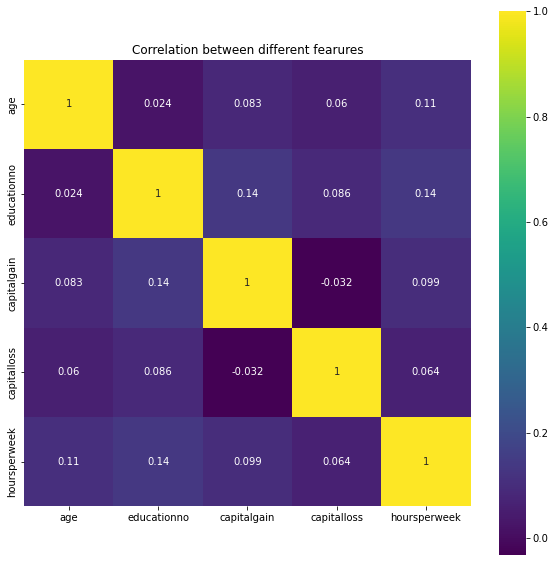

In [10]:
correlation = test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')       
plt.title('Correlation between different fearures')

Text(0.5, 1.0, 'Correlation between different fearures')

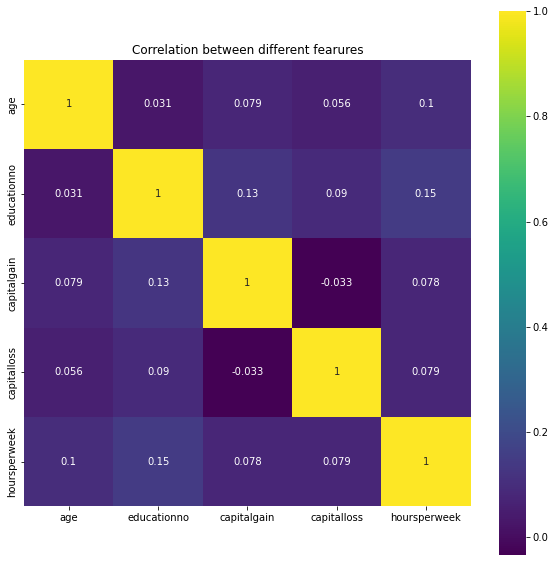

In [11]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')       
plt.title('Correlation between different fearures')

<AxesSubplot:>

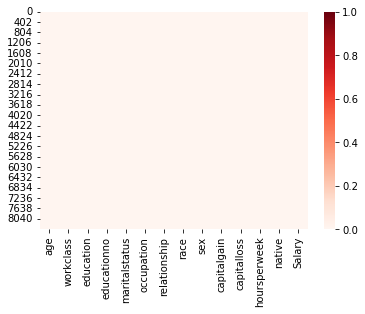

In [12]:
sns.heatmap(test.isnull(),cmap='Reds')

<AxesSubplot:>

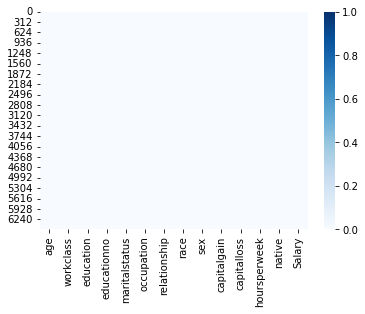

In [13]:
sns.heatmap(train.isnull(),cmap='Blues')

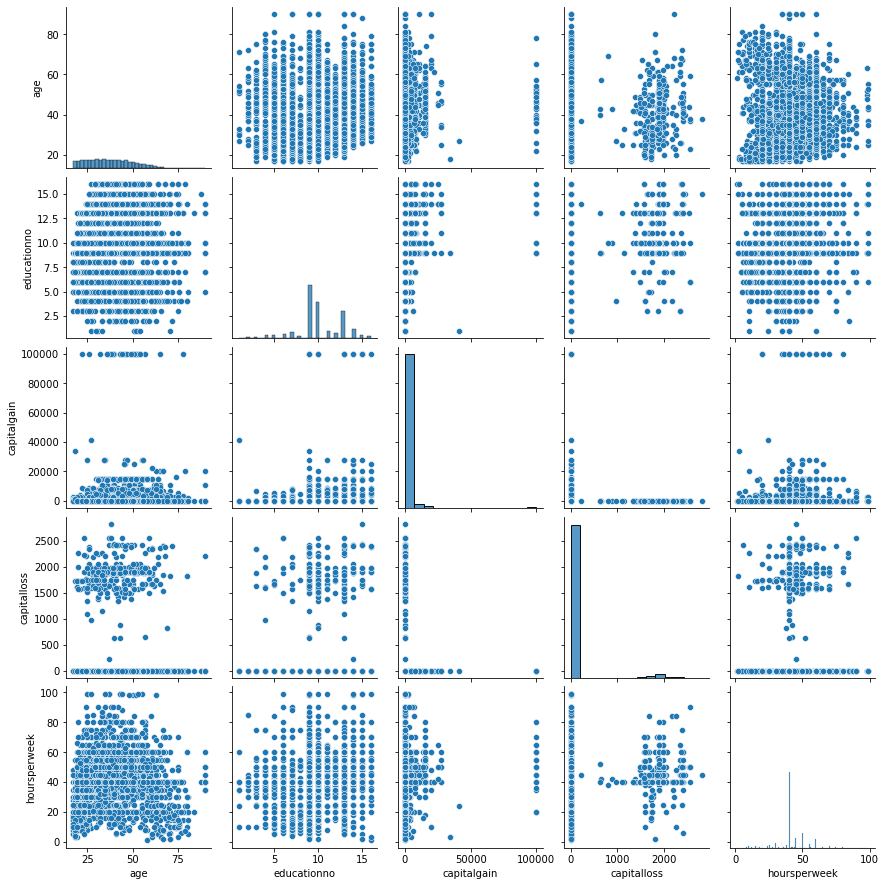

In [14]:
sns.pairplot(train)

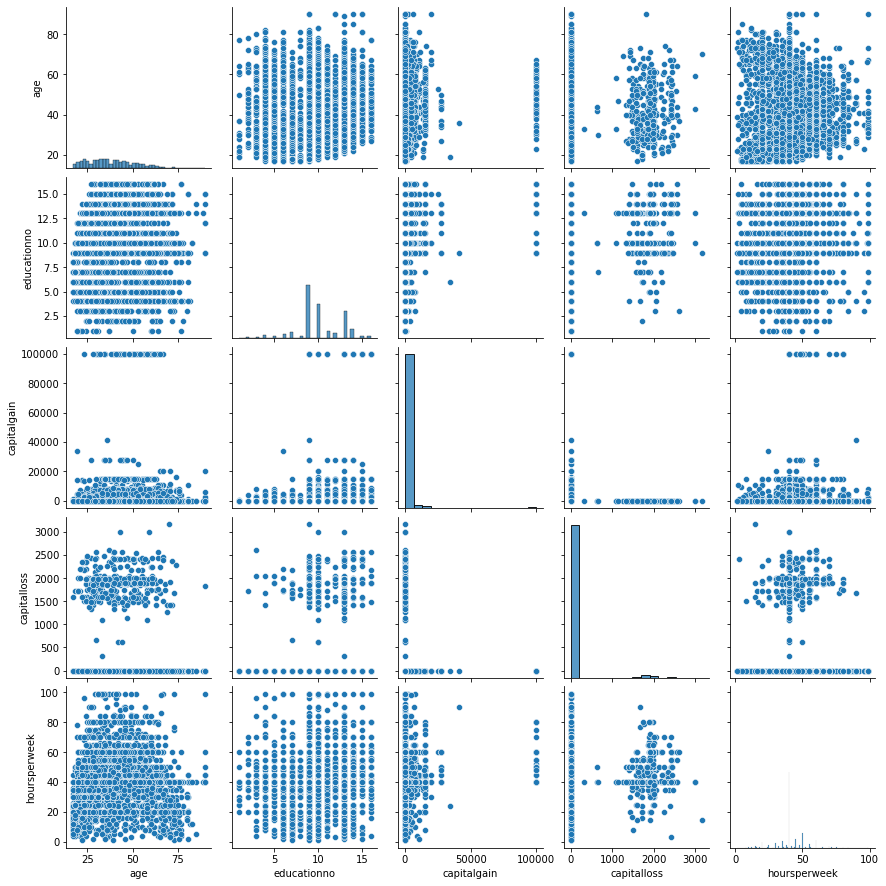

In [15]:
sns.pairplot(test)

In [16]:
train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = train[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,0,13,0,0,0,0,0,2174.0,0.0,40.0,0,0
1,50,1,0,13,1,1,1,0,0,0.0,0.0,13.0,0,0
2,38,2,1,9,2,2,0,0,0,0.0,0.0,40.0,0,0
3,53,2,2,7,1,2,1,1,0,0.0,0.0,40.0,0,0
4,28,2,0,13,1,3,2,1,1,0.0,0.0,40.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,46,2,12,6,0,4,0,0,1,0.0,0.0,25.0,16,0
6528,31,2,0,13,0,5,0,0,1,0.0,0.0,65.0,0,1
6529,38,4,0,13,1,3,2,0,1,7688.0,0.0,40.0,0,1
6530,44,4,3,14,1,3,1,0,0,0.0,0.0,40.0,0,1


In [17]:
test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']] = test[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']].apply(lambda x: pd.factorize(x)[0])
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,0,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,3,10,1,0,1,0,0,7688,0,40,0,1
4,34,0,4,6,0,3,2,1,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8431,37,0,3,10,1,5,1,1,0,0,0,40,0,1
8432,33,2,7,13,4,5,2,1,0,0,1590,60,0,0
8433,48,4,7,13,1,7,1,1,0,0,0,38,0,1
8434,29,0,10,11,0,12,0,1,0,0,0,40,0,0


In [18]:
X=train.iloc[:,0:13]
Y=train.iloc[:,13]
x=test.iloc[:,0:13]
y=test.iloc[:,13]

In [19]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,0,0,13,0,0,0,0,0,2174.0,0.0,40.0,0
1,50,1,0,13,1,1,1,0,0,0.0,0.0,13.0,0
2,38,2,1,9,2,2,0,0,0,0.0,0.0,40.0,0
3,53,2,2,7,1,2,1,1,0,0.0,0.0,40.0,0
4,28,2,0,13,1,3,2,1,1,0.0,0.0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,46,2,12,6,0,4,0,0,1,0.0,0.0,25.0,16
6528,31,2,0,13,0,5,0,0,1,0.0,0.0,65.0,0
6529,38,4,0,13,1,3,2,0,1,7688.0,0.0,40.0,0
6530,44,4,3,14,1,3,1,0,0,0.0,0.0,40.0,0


In [20]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6527    0
6528    1
6529    1
6530    1
6531   -1
Name: Salary, Length: 6532, dtype: int64

In [21]:
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,0,0,7,0,0,0,0,0,0,0,40,0
1,38,0,1,9,1,1,1,1,0,0,0,50,0
2,28,1,2,12,1,2,1,1,0,0,0,40,0
3,44,0,3,10,1,0,1,0,0,7688,0,40,0
4,34,0,4,6,0,3,2,1,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8431,37,0,3,10,1,5,1,1,0,0,0,40,0
8432,33,2,7,13,4,5,2,1,0,0,1590,60,0
8433,48,4,7,13,1,7,1,1,0,0,0,38,0
8434,29,0,10,11,0,12,0,1,0,0,0,40,0


In [22]:
y

0       0
1       0
2       1
3       1
4       0
       ..
8431    1
8432    0
8433    1
8434    0
8435   -1
Name: Salary, Length: 8436, dtype: int64

# Naive Bayes

# Multinominal Naive Bayes

In [30]:
clf_mb = MB()
clf_mb.fit(x,y)

MultinomialNB()

In [33]:
train_pred_m = clf_mb.predict(x)
accuracy_train_m = np.mean(train_pred_m==y)

In [35]:
test_pred_m = clf_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [36]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

Training accuracy is: 0.07456140350877193 
 Testing accuracy is: 0.07456140350877193


# Gaussian Naive Bayes

In [38]:
clf_gb = GB()
clf_gb.fit(x,y)

GaussianNB()

In [39]:
train_pred_g = clf_gb.predict(x)
accuracy_train_g = np.mean(train_pred_g==y)

In [40]:
test_pred_g = clf_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [41]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.7989568515884305 
 Testing accuracy is: 0.7989568515884305
